In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base24 = pd.read_csv('obitos-2024.csv')
base23 = pd.read_csv('obitos-2023.csv')
base22 = pd.read_csv('obitos-2022.csv')
base21 = pd.read_csv('obitos-2021.csv')
base20 = pd.read_csv('obitos-2020.csv')
base19 = pd.read_csv('obitos-2019.csv')

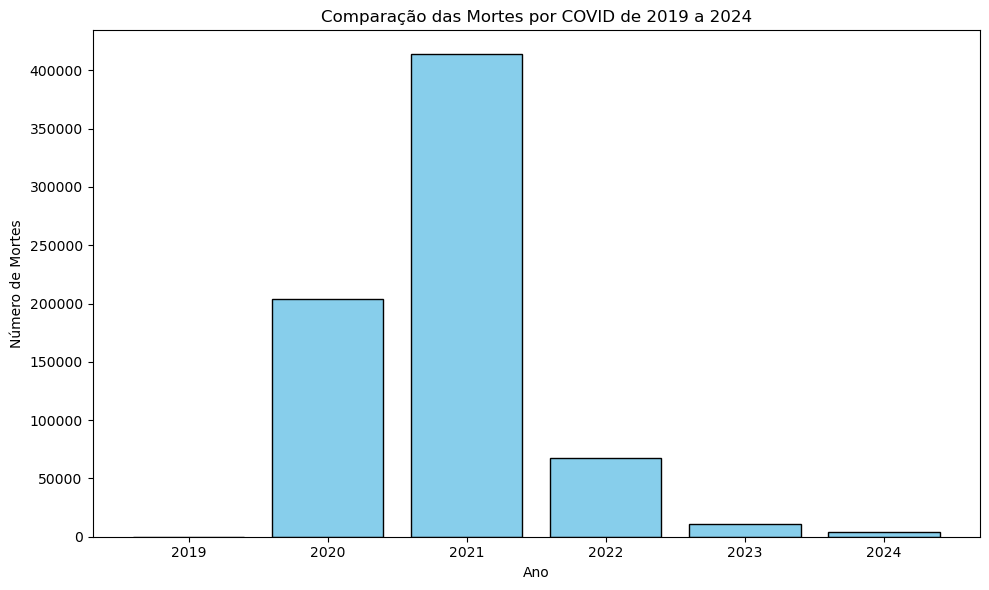

In [44]:
# Adicionar uma coluna de ano a cada DataFrame
base24['ano'] = 2024
base23['ano'] = 2023
base22['ano'] = 2022
base21['ano'] = 2021
base20['ano'] = 2020
base19['ano'] = 2019

# Filtrar os dados para obter apenas os registros de mortes por COVID
covid_2024 = base24[base24['tipo_doenca'] == 'COVID']
covid_2023 = base23[base23['tipo_doenca'] == 'COVID']
covid_2022 = base22[base22['tipo_doenca'] == 'COVID']
covid_2021 = base21[base21['tipo_doenca'] == 'COVID']
covid_2020 = base20[base20['tipo_doenca'] == 'COVID']
covid_2019 = base19[base19['tipo_doenca'] == 'COVID']

# Calcular a soma total de mortes por COVID para cada ano
total_2024 = covid_2024['total'].sum()
total_2023 = covid_2023['total'].sum()
total_2022 = covid_2022['total'].sum()
total_2021 = covid_2021['total'].sum()
total_2020 = covid_2020['total'].sum()
total_2019 = covid_2019['total'].sum()

# Preparar os dados para o gráfico
anos = ['2019', '2020', '2021', '2022', '2023', '2024']
totais = [total_2019, total_2020, total_2021, total_2022, total_2023, total_2024]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(anos, totais, color='skyblue', edgecolor='black')

# Adicionar título e rótulos aos eixos
plt.title('Comparação das Mortes por COVID de 2019 a 2024')
plt.xlabel('Ano')
plt.ylabel('Número de Mortes')

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [46]:
total_mortes = total_2024 + total_2023 + total_2022 + total_2021 + total_2020 + total_2019
total_mortes

699271

In [48]:
covid = [covid_2024, covid_2023, covid_2022, covid_2021, covid_2020, covid_2019]
covid_total = pd.concat(covid, ignore_index=True)

# Filtrar os dados para obter apenas os registros de mortes por COVID
covid_data = covid_total[covid_total['tipo_doenca'] == 'COVID']

# Agrupar os dados por estado e calcular a soma total de mortes por estado
mortes_por_estado = covid_data.groupby('uf')['total'].sum()

# Calcular a soma total de mortes por COVID
soma_total_mortes = mortes_por_estado.sum()
print(f"Soma total de mortes por COVID: {soma_total_mortes}")

# Calcular a média de mortes por estado
media_mortes_por_estado = soma_total_mortes / len(mortes_por_estado)
print(f"Média de mortes por estado: {media_mortes_por_estado:.2f}")

# Calcular a mediana de mortes por estado
mediana_mortes_por_estado = mortes_por_estado.median()
print(f"Mediana de mortes por estado: {mediana_mortes_por_estado}")

print(mortes_por_estado)

Soma total de mortes por COVID: 699271
Média de mortes por estado: 25898.93
Mediana de mortes por estado: 11300.0
uf
AC      2353
AL      6816
AM     10710
AP      2019
BA     28959
CE     27437
DF     11300
ES     15547
GO     28198
MA      8825
MG     69298
MS     11019
MT     13308
PA     15139
PB     10575
PE     22842
PI      7038
PR     48986
RJ     76214
RN      8169
RO      6961
RR      1975
RS     42665
SC     23022
SE      6040
SP    190130
TO      3726
Name: total, dtype: int64


In [50]:

# Agrupar os dados por estado (UF) e sexo, calculando a soma total de mortes
mortes_por_estado_sexo = covid_data.groupby(['uf', 'sexo'])['total'].sum().unstack(fill_value=0)

# Calcular a média de mortes por sexo por UF
media_mortes_por_sexo = mortes_por_estado_sexo.mean()
print("Média de mortes por sexo por UF:")
print(media_mortes_por_sexo)

# Calcular a soma total de mortes por sexo
soma_total_mortes_sexo = mortes_por_estado_sexo.sum()
print("\nSoma total de mortes por sexo:")
print(soma_total_mortes_sexo)

# Calcular a soma total de mortes por COVID
soma_total_mortes = soma_total_mortes_sexo.sum()
print(f"\nSoma total de mortes por COVID: {soma_total_mortes}")

# Calcular o percentual de mortes por sexo em relação ao total
percentual_mortes_sexo = (soma_total_mortes_sexo / soma_total_mortes) * 100
print("\nPercentual de mortes por sexo em relação ao total:")
print(percentual_mortes_sexo)


Média de mortes por sexo por UF:
sexo
F    11456.592593
I       14.962963
M    14427.370370
dtype: float64

Soma total de mortes por sexo:
sexo
F    309328
I       404
M    389539
dtype: int64

Soma total de mortes por COVID: 699271

Percentual de mortes por sexo em relação ao total:
sexo
F    44.235783
I     0.057774
M    55.706443
dtype: float64


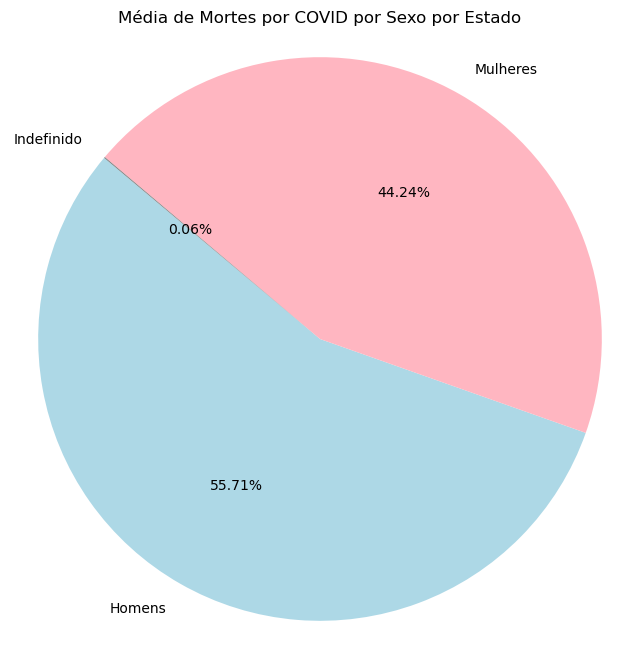

In [52]:
# Dados para o gráfico de sexo de cada obito
labels = ['Homens', 'Mulheres', 'Indefinido']
sizes = [media_mortes_por_sexo['M'], media_mortes_por_sexo['F'], media_mortes_por_sexo['I']]
colors = ['lightblue','lightpink','gray']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.title('Média de Mortes por COVID por Sexo por Estado')
plt.axis('equal')
plt.show()

In [54]:
# Agrupar os dados por faixa etária, calculando a soma total de mortes
mortes_por_faixa_etaria = covid_data.groupby('faixa_etaria')['total'].sum()

# Identificar a faixa etária com o maior número de óbitos
faixa_mais_obitos = mortes_por_faixa_etaria.idxmax()
total_obitos_faixa_mais_obitos = mortes_por_faixa_etaria.max()

# Calcular a soma total de mortes por COVID
soma_total_mortes = mortes_por_faixa_etaria.sum()

# Calcular a porcentagem da faixa etária com mais óbitos em relação ao total
percentual_faixa_mais_obitos = (total_obitos_faixa_mais_obitos / soma_total_mortes) * 100

print(f"A maior parte dos óbitos por COVID aconteceu na faixa etária de {faixa_mais_obitos}.")
print(f"Essa faixa representa {percentual_faixa_mais_obitos:.2f}% do total de óbitos por COVID no Brasil.")

A maior parte dos óbitos por COVID aconteceu na faixa etária de 70 - 79.
Essa faixa representa 24.10% do total de óbitos por COVID no Brasil.


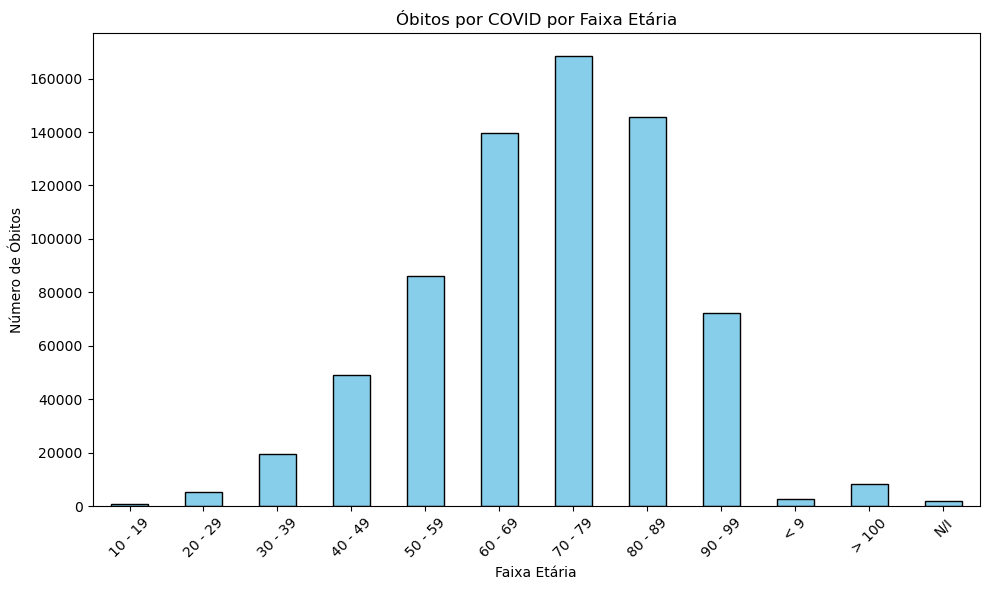

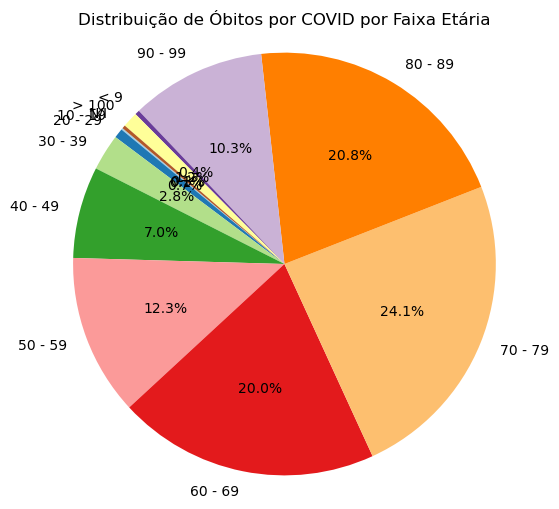

In [56]:
# Gráfico de barras das mortes por faixa etária
plt.figure(figsize=(10, 6))
mortes_por_faixa_etaria.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Óbitos por COVID por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Óbitos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de pizza para a distribuição das mortes por faixa etária
plt.figure(figsize=(6, 6))
mortes_por_faixa_etaria.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(mortes_por_faixa_etaria))))
plt.title('Distribuição de Óbitos por COVID por Faixa Etária')
plt.ylabel('') 
plt.axis('equal')
plt.show()

In [58]:
# Calcular a porcentagem de óbitos de pessoas com 60 anos ou mais
porcentagem_idosos = mortes_por_faixa_etaria['60-79':].sum() / mortes_por_faixa_etaria.sum() * 100

print(f"Porcentagem de óbitos de idosos (60 anos ou mais): {porcentagem_idosos:.2f}%")

Porcentagem de óbitos de idosos (60 anos ou mais): 57.04%


In [60]:
# Definir locais considerados adequados
locais_adequados = ['HOSPITAL', 'POSTO_SAUDE', 'OUTROS_SERVICOS_SAUDE']

# Criar uma cópia do DataFrame para evitar o SettingWithCopyWarning
covid_data = covid_data.copy()

# Criar a nova coluna usando loc e uma função lambda
covid_data.loc[:, 'local_adequado'] = covid_data['local_obito'].apply(lambda x: 'Adequado' if x in locais_adequados else 'Inadequado')

# Agrupar os dados por local adequado/inadequado e calcular a soma total de mortes
mortes_por_local = covid_data.groupby('local_adequado')['total'].sum()

# Calcular a quantidade total de mortes por COVID
soma_total_mortes = mortes_por_local.sum()

# Calcular os valores específicos e percentuais para locais adequados, inadequados e desconhecidos
mortes_adequadas = mortes_por_local.get('Adequado', 0)
mortes_inadequadas = mortes_por_local.get('Inadequado', 0)
mortes_desconhecidas = soma_total_mortes - (mortes_adequadas + mortes_inadequadas)

percentual_adequadas = (mortes_adequadas / soma_total_mortes) * 100
percentual_inadequadas = (mortes_inadequadas / soma_total_mortes) * 100
percentual_desconhecidas = (mortes_desconhecidas / soma_total_mortes) * 100
print(f"Da quantidade total de {soma_total_mortes} óbitos por COVID, {mortes_adequadas} ocorreram em locais adequados, o que representa aproximadamente {percentual_adequadas:.2f}% da quantidade total.")
print(f"Sendo assim, outros {mortes_inadequadas} óbitos ocorreram em locais inadequados, representando cerca de {percentual_inadequadas:.2f}% do total.")
print(f"E outros {mortes_desconhecidas} não há informações sobre o local dos óbitos, sendo esses {percentual_desconhecidas:.2f}% dos óbitos.")

Da quantidade total de 699271 óbitos por COVID, 663968 ocorreram em locais adequados, o que representa aproximadamente 94.95% da quantidade total.
Sendo assim, outros 35303 óbitos ocorreram em locais inadequados, representando cerca de 5.05% do total.
E outros 0 não há informações sobre o local dos óbitos, sendo esses 0.00% dos óbitos.


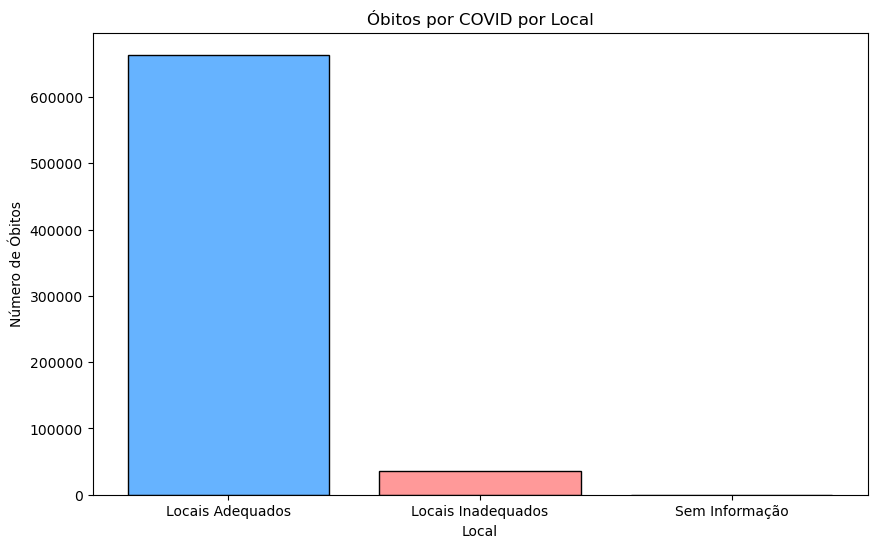

In [62]:
# Criando grafico relativo a local dos obitos
labels = ['Locais Adequados', 'Locais Inadequados', 'Sem Informação']
sizes = [mortes_adequadas, mortes_inadequadas, mortes_desconhecidas]
colors = ['#66b3ff', '#ff9999', '#99ff99']

# Gráfico de barras dos óbitos por local adequado/inadequado
plt.figure(figsize=(10, 6))
plt.bar(labels, sizes, color=colors, edgecolor='black')
plt.title('Óbitos por COVID por Local')
plt.xlabel('Local')
plt.ylabel('Número de Óbitos')
plt.show()

In [77]:
# Agrupar os dados por ano, calculando a soma total de mortes por ano
mortes_por_ano = covid_data.groupby('ano')['total'].sum()

# Número de anos analisados
num_anos = 6

# Calcular a média anual de mortes por COVID
media_anual_mortes = mortes_por_ano.mean()
print(f"Média anual de mortes por COVID: {media_anual_mortes:.2f}")

# Calcular o desvio padrão das mortes por COVID por ano
desvio_padrao = mortes_por_ano.std()
print(f"Desvio padrão do número de mortes por COVID por ano: {desvio_padrao:.2f}")

# Calcular o coeficiente de variação (CV)
coeficiente_variacao = (desvio_padrao / media_anual_mortes) * 100
print(f"Coeficiente de variação (CV): {coeficiente_variacao:.2f}%")

Média anual de mortes por COVID: 116545.17
Desvio padrão do número de mortes por COVID por ano: 164762.47
Coeficiente de variação (CV): 141.37%


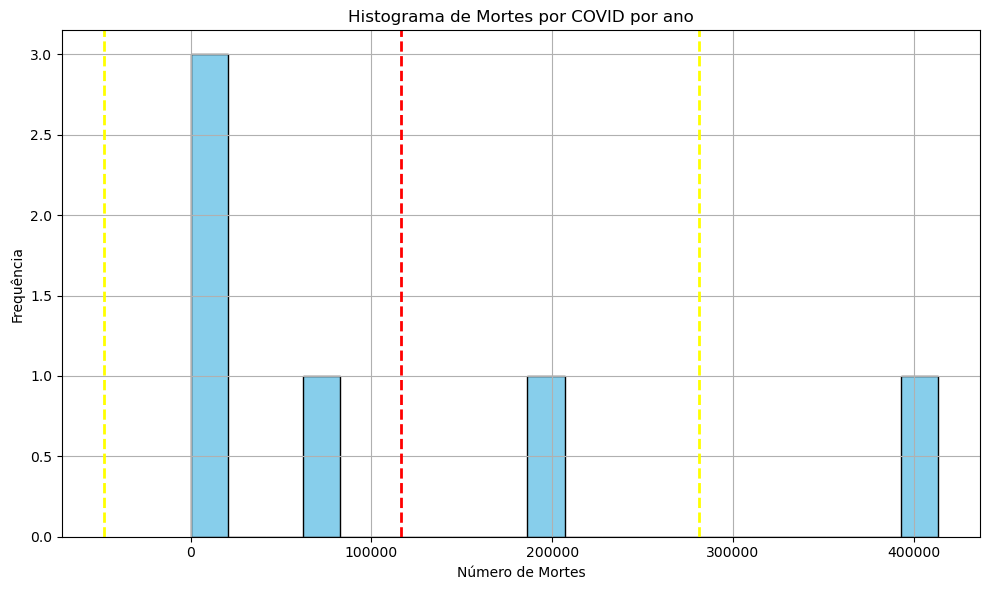

In [79]:
# Criar o histograma
plt.figure(figsize=(10, 6))
mortes_por_ano.plot(kind="hist", bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Número de Mortes")
plt.ylabel("Frequência")
plt.title("Histograma de Mortes por COVID por ano")
plt.axvline(x=media_anual_mortes, color="red", linestyle="dashed", linewidth=2, label=f"Média: {media_mortes_por_estado:.2f}")
plt.axvline(x=media_anual_mortes + desvio_padrao, color="yellow", linestyle="dashed", linewidth=2, label=f"Média + Desvio Padrão: {(media_anual_mortes + desvio_padrao):.2f}")
plt.axvline(x=media_anual_mortes - desvio_padrao, color="yellow", linestyle="dashed", linewidth=2, label=f"Média - Desvio Padrão: {(media_anual_mortes - desvio_padrao):.2f}")
plt.grid(True)
plt.tight_layout()
plt.show()

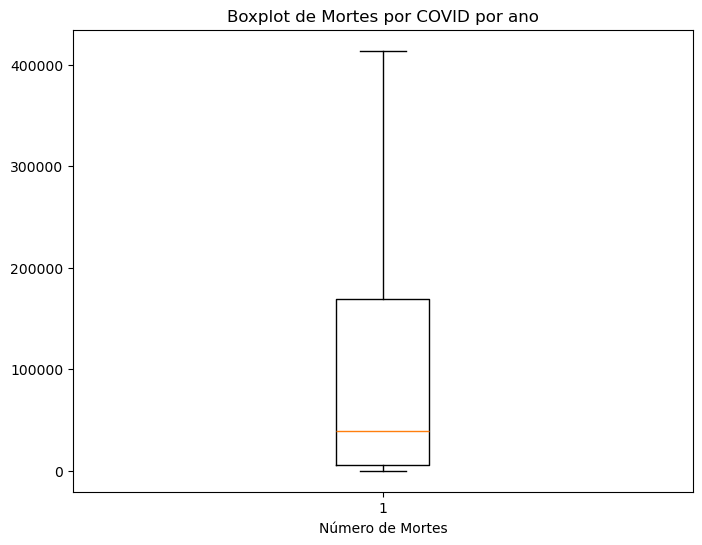

In [81]:
# Criar o boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(mortes_por_ano)

plt.xlabel("Número de Mortes")
plt.title("Boxplot de Mortes por COVID por ano")
plt.show()